<a href="https://colab.research.google.com/github/ademarionobre/DataViz/blob/main/Modelagem_de_Dados_com_python_PIB_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de dados do PIB Mundial para visualização dos dados.

Será utilizando dados contidos no site do wikipedia.

In [1]:
# Importando as Bibliotecas/Frameworks

# Lib para Dados
import pandas as pd

#Lib para visualização
import matplotlib.pyplot

# Lib para avisos de erros
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ler os dados da Web - site wikipedia.
Tabela_Sites = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal')

print(f'Foi Localizado: { len(Tabela_Sites) } tabelas ')

Foi Localizado: 11 tabelas 


In [3]:
# Separando as Tabelas de interesse.
PIB_2020 = Tabela_Sites[3]
PIB_2018 = Tabela_Sites[4]
PIB_2014 = Tabela_Sites[5]

print( len(PIB_2020), len(PIB_2018), len(PIB_2014) )

196 190 212


In [4]:
# Dimensão - comando para verificar a estrutura da tabela em linhas e colunas.
PIB_2020.shape

(196, 3)

In [6]:
# Verificar campos nulos nas colunas
PIB_2020.isnull().sum()

Posição                  5
País                     0
PIB (Trilhões de US$)    1
dtype: int64

In [7]:
# Filtrar campos Nulos para retirar posteriormente.
PIB_2020 = PIB_2020.loc[ PIB_2020['Posição'].notnull() ]

In [8]:
# Verificar primeiros dados
PIB_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580250.0
3,2,China,14860775.0
4,3,Japão,4910580.0
5,4,Alemanha,3780553.0
6,5,Reino Unido,2638296.0


In [11]:
# Verificar os ultimos dados
PIB_2020.tail()

,Posição,País,PIB (Trilhões de US$)
191,186,Ilhas Marshall,214.0
192,187,Kiribati,189.0
193,188,Nauru,112.0
194,189,Tuvalu,42.0
195,—,Síria,NaN


In [12]:
# Colunas - nome das colunas na estrutura do dataframe.
PIB_2020.columns

Index(['Posição', 'País', 'PIB (Trilhões de US$)'], dtype='object')

In [13]:
# Verificar index
PIB_2020.index

Int64Index([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            186, 187, 188, 189, 190, 191, 192, 193, 194, 195],
           dtype='int64', length=191)

In [ ]:
# Verificar tipo da informação
PIB_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 195
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Posição                191 non-null    object 
 1   País                   191 non-null    object 
 2   PIB (Trilhões de US$)  190 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [ ]:
# Verificar campos duplicados
PIB_2020.duplicated().sum()

0

In [ ]:
# REdimensar os valores
PIB_2020['PIB (Trilhões de US$)'] = PIB_2020['PIB (Trilhões de US$)'] / 1000

# Verificando
PIB_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Estatistica DEscritiva
PIB_2020.describe()

,PIB (Trilhões de US$)
count,190.000000
mean,438.774563
std,1913.031374
min,0.042000
25%,7.983500
50%,36.314000
75%,236.005500
max,20580.250000


In [ ]:
# Retirnaod o traço
PIB_2020 = PIB_2020.loc[ PIB_2020['Posição'] != '—' ]

PIB_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Conversao para numerico
PIB_2020['Posição'] = pd.to_numeric( PIB_2020['Posição'] )

PIB_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Substituir a informação

# Acessar o index
PIB_2020.loc[ PIB_2020['Posição'] == '—' ].index

PIB_2020.iloc[165,0] = 1

In [ ]:
PIB_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 194
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Posição                189 non-null    int64  
 1   País                   189 non-null    object 
 2   PIB (Trilhões de US$)  189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [ ]:
# ordenação
PIB_2020.sort_index( ascending=False )
PIB_2020['Posição'].sort_values( ascending=False 'ou True' )

194    189
193    188
192    187
191    186
190    185
      ... 
6        5
5        4
4        3
3        2
1        1
Name: Posição, Length: 189, dtype: int64

In [ ]:
# Resetando o Index
PIB_2020.reset_index( drop=True )

,Posição,País,PIB (Trilhões de US$)
0,1,Estados Unidos,20580.250
1,2,China,14860.775
2,3,Japão,4910.580
3,4,Alemanha,3780.553
4,5,Reino Unido,2638.296
...,...,...,...
184,185,Palau,0.284
185,186,Ilhas Marshall,0.214
186,187,Kiribati,0.189
187,188,Nauru,0.112


In [ ]:
# Exlcuir Colunas
PIB_2020.drop( columns='Posição' ) #,inplace=True )

,País,PIB (Trilhões de US$)
1,Estados Unidos,20580.250
3,China,14860.775
4,Japão,4910.580
5,Alemanha,3780.553
6,Reino Unido,2638.296
...,...,...
190,Palau,0.284
191,Ilhas Marshall,0.214
192,Kiribati,0.189
193,Nauru,0.112


In [ ]:
PIB_2020.head()

,Posição,País,PIB (Trilhões de US$)
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
# Renomeando Colunas
PIB_2020.rename(
    columns={'PIB (Trilhões de US$)': '2020'}, inplace=True
)

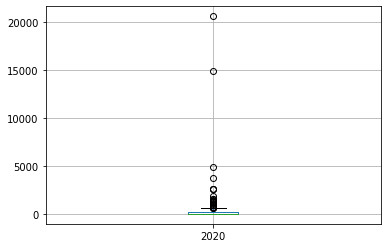

In [ ]:
PIB_2020.boxplot( column='2020' )

In [ ]:
# Criando uma coluna

# Calculei a Mediana
Media = PIB_2020['2020'].mean()

# Função
def Classe_Media (Dados):

  # condição
  if Dados['2020'] >= Media:
    return 'Acima'
  else:
    return 'Abaixo'

# Aplicar a função
PIB_2020['Classe'] = PIB_2020.apply(Classe_Media, axis=1 )

PIB_2020.head()

,Posição,País,2020,Classe
1,1,Estados Unidos,20580.250,Acima
3,2,China,14860.775,Acima
4,3,Japão,4910.580,Acima
5,4,Alemanha,3780.553,Acima
6,5,Reino Unido,2638.296,Acima


In [ ]:
# Analises 
PIB_2020.groupby(['Classe']).count()

,Posição,País,2020
Classe,,,
Abaixo,161,161,161
Acima,28,28,28


In [ ]:
# Analises 
PIB_2020.groupby(['Classe', 'Posição']).count()

País  2020
Classe Posição            
Abaixo 29          1     1
       30          1     1
       31          1     1
       32          1     1
       33          1     1
...              ...   ...
Acima  24          1     1
       25          1     1
       26          1     1
       27          1     1
       28          1     1

[189 rows x 2 columns]

In [ ]:
Tabela_Sites[3].columns == PIB_2018.columns

array([ True,  True, False])

In [ ]:
PIB_2018.columns

Index(['Posição', 'País', 'PIB (Millhões de US$)'], dtype='object')

In [ ]:
PIB_2020.columns

Index(['Posição', 'País', '2020', 'Classe'], dtype='object')

In [ ]:
Novo_PIB_2020 = PIB_2020.drop( columns='Classe' )

Novo_PIB_2018 = PIB_2018.rename( columns={'PIB (Millhões de US$)' : '2020'} )

In [ ]:
Novo_PIB_2020.columns == Novo_PIB_2018.columns

array([ True,  True,  True])

In [ ]:
# Empilhando os DAdos
pd.concat( [Novo_PIB_2020, Novo_PIB_2018] )

,Posição,País,2020
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296
...,...,...,...
185,181,Palau,NaN
186,182,Ilhas Marshall,NaN
187,183,Kiribati,NaN
188,184,Nauru,NaN


In [ ]:
# Cruzar os dados
Novo_PIB_2020.head()

,Posição,País,2020
1,1,Estados Unidos,20580.250
3,2,China,14860.775
4,3,Japão,4910.580
5,4,Alemanha,3780.553
6,5,Reino Unido,2638.296


In [ ]:
Base_Cruzada = pd.merge(Novo_PIB_2020, Novo_PIB_2018, how='inner', on=['País'] )

In [ ]:
Base_Cruzada.head()

,Posição_x,País,2020_x,Posição_y,2020_y
0,1,Estados Unidos,20580.250,1,NaN
1,2,China,14860.775,2,NaN
2,3,Japão,4910.580,3,NaN
3,4,Alemanha,3780.553,4,NaN
4,5,Reino Unido,2638.296,5,NaN


In [ ]:
Base_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Posição_x  178 non-null    int64  
 1   País       178 non-null    object 
 2   2020_x     178 non-null    float64
 3   Posição_y  178 non-null    object 
 4   2020_y     0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.3+ KB


In [ ]:
Base_Cruzada['Posição_y'].value_counts()

1      1
—      1
119    1
120    1
121    1
      ..
64     1
66     1
65     1
67     1
185    1
Name: Posição_y, Length: 178, dtype: int64

In [ ]:
Base_Cruzada = Base_Cruzada.loc[ Base_Cruzada['Posição_y'] != '—' ]

In [ ]:
Base_Cruzada['Posição_y'] = pd.to_numeric( Base_Cruzada['Posição_y'] )

In [ ]:
Base_Cruzada['Subiu ou Caiu'] = Base_Cruzada['Posição_y'] - Base_Cruzada['Posição_x']

In [ ]:
Base_Cruzada.head()

,Posição_x,País,2020_x,Posição_y,2020_y,Subiu ou Caiu
0,1,Estados Unidos,20580.250,1,NaN,0
1,2,China,14860.775,2,NaN,0
2,3,Japão,4910.580,3,NaN,0
3,4,Alemanha,3780.553,4,NaN,0
4,5,Reino Unido,2638.296,5,NaN,0


In [ ]:
Base_Cruzada.groupby(['Subiu ou Caiu']).count()

,Posição_x,País,2020_x,Posição_y,2020_y
Subiu ou Caiu,,,,,
-14,1,1,1,1,0
-8,1,1,1,1,0
-6,1,1,1,1,0
-5,6,6,6,6,0
-4,32,32,32,32,0
-3,10,10,10,10,0
-2,28,28,28,28,0
-1,59,59,59,59,0
0,30,30,30,30,0


In [ ]:
Base_Cruzada.loc[ Base_Cruzada['País'] == 'Brasil']

,Posição_x,País,2020_x,Posição_y,2020_y,Subiu ou Caiu
11,12,Brasil,1363.767,9,NaN,-3


In [ ]:
# Libs
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Base_Cruzada.head()

,Posição_x,País,2020_x,Posição_y,2020_y,Subiu ou Caiu
0,1,Estados Unidos,20580.250,1,NaN,0
1,2,China,14860.775,2,NaN,0
2,3,Japão,4910.580,3,NaN,0
3,4,Alemanha,3780.553,4,NaN,0
4,5,Reino Unido,2638.296,5,NaN,0


In [ ]:
Analise_Ranking = Base_Cruzada[['País', '2020_x', 'Subiu ou Caiu']]

Analise_Ranking.head()

,País,2020_x,Subiu ou Caiu
0,Estados Unidos,20580.250,0
1,China,14860.775,0
2,Japão,4910.580,0
3,Alemanha,3780.553,0
4,Reino Unido,2638.296,0


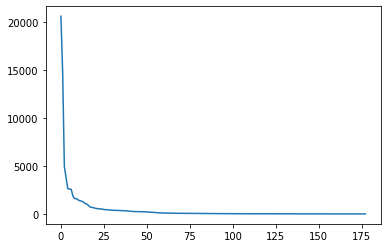

In [ ]:
plt.plot( Analise_Ranking['2020_x'] )

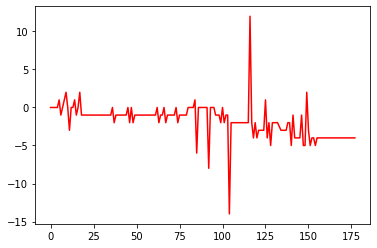

In [ ]:
plt.plot( Analise_Ranking['Subiu ou Caiu'], color='red' )

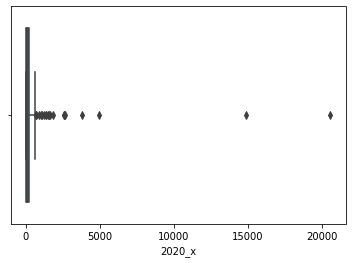

In [ ]:
sns.boxplot( Analise_Ranking['2020_x'] )

<BarContainer object of 10 artists>

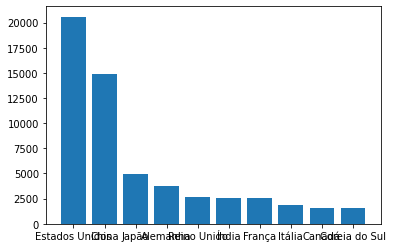

In [ ]:
plt.bar( Analise_Ranking['País'][0:10], Analise_Ranking['2020_x'][0:10] )

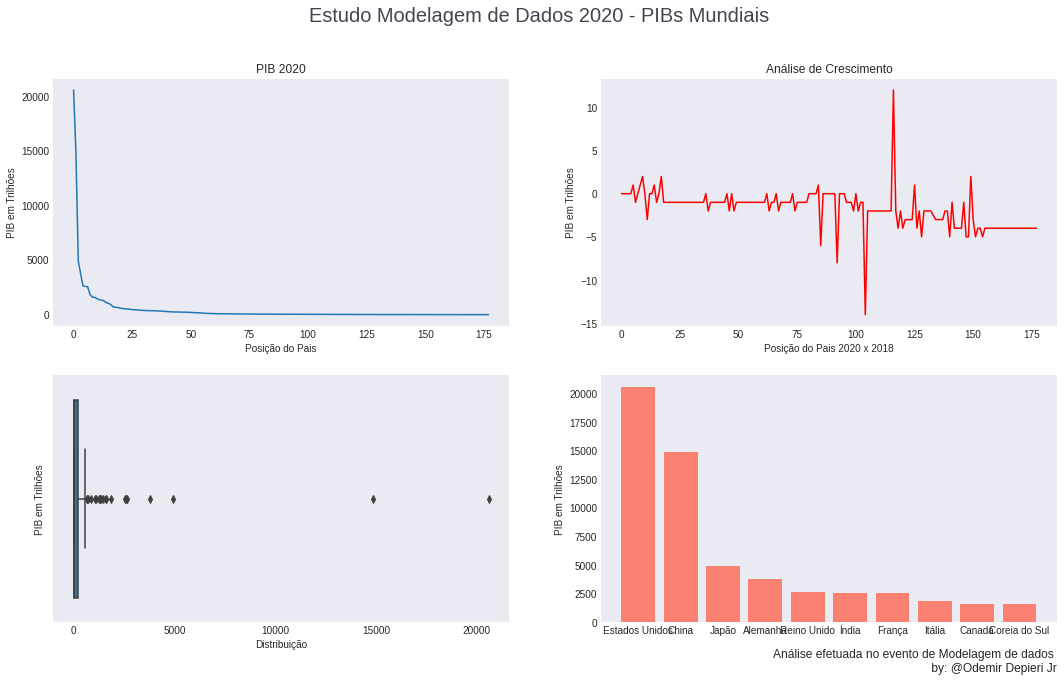

In [ ]:
# Criando o Relatorio

# Tamanho
plt.figure( figsize=(18, 10) )

# estilo
plt.style.use('seaborn-dark')

# Dividor o relatorio
plt.subplot(2, 2, 1)
plt.title('PIB 2020')
plt.plot( Analise_Ranking['2020_x'] )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Posição do Pais')

plt.subplot(2, 2, 2)
plt.title('Análise de Crescimento')
plt.plot( Analise_Ranking['Subiu ou Caiu'], color='red' )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Posição do Pais 2020 x 2018')

plt.subplot(2, 2, 3)
sns.boxplot( Analise_Ranking['2020_x'] )
plt.ylabel('PIB em Trilhões')
plt.xlabel('Distribuição')

plt.subplot(2, 2, 4)
plt.bar( Analise_Ranking['País'][0:10], Analise_Ranking['2020_x'][0:10], color='salmon' )
plt.ylabel('PIB em Trilhões')
plt.xlabel(' ')

plt.suptitle('Estudo Modelagem de Dados 2020 - PIBs Mundiais', fontsize=20, color='#474350')

plt.annotate(
    'Análise efetuada no evento de Modelagem de dados \n by: @Odemir Depieri Jr',
    xy=(1, -0.20), xycoords='axes fraction', ha='right', fontsize=12
);

plt.savefig()